# v3.4

In [ ]:
#@title Imports { display-mode: "form" }
from time import time as time_now
from time import sleep as time_sleep

import requests
from bs4 import BeautifulSoup

import os
import google.colab as gc

!pip install img2pdf
import img2pdf

! pip install aiohttp

from IPython.core.display import HTML, clear_output
from IPython.display import Image,display
from pprint import pprint

from shutil import rmtree



# the following has nealy no use, but looks pretty
path2lib = "mscra" #@param {type:"string"}
if "/content" not in path2lib:
  path2lib = "/content/" + path2lib
else:pass
# end of useless

if os.path.isdir(path2lib):
  rmtree(path2lib)
else:
  pass

!git clone -b CrazyMetoFQ-from_homepage https://github.com/CrazyMetoFQ/mscra.git $path2lib


from mscra import img_dis as imgd



do_clear_output = True #@param {type:"boolean"}
if do_clear_output:
  clear_output()
else:pass

## MAIN



In [ ]:
#@title homePage urls

homePage_url = "https://redo-of-healer.online/" #@param {type:"string"}
print_all = False #@param {type:"boolean"}
print_done = True #@param {type:"boolean"}
do_reverse = True #@param {type:"boolean"}

#@markdown <br>

start_l = 6 #@param {type:"slider", min:0, max:25, step:1}
stop_l = -12 #@param {type:"slider", min:-25, max:1, step:1}
step_l = 1 #@param {type:"slider", min:-2, max:2, step:1}

#@markdown ---

if stop_l == 0:
  stop_l = None
else:
  pass

hP_r = requests.get(homePage_url)
hP_soup = BeautifulSoup(hP_r.content, "lxml")

un_all_links = hP_soup.findAll("a")

if print_all:
  pprint(un_all_links)
  print("\n-----------------\n")
else:
  pass

all_links = [l['href'] for l in un_all_links[start_l:stop_l:step_l]]

if do_reverse:
  all_links.reverse()
else:
  pass

if print_done:
  pprint(all_links)
else:
  pass

In [12]:
start_time = time_now()
#@title Asyncrous Requests (supa fast multi) THIS IS THE MAIN STUFF TO RUN { display-mode: "form" }
#@markdown ---
#@markdown #Main Stuff:
#@markdown >Get the link by going to the websites first chapter then remove the ch number and replace with {}. <br>
#@markdown >Min, max are the number of chapters u want
# base_link where the number will change in the link such as ch-1, ch-2 put {}
base_link = "https://read-onepiecemanga.com/manga/one-piece-chapter-{}/" #@param {type:"string"}

# putting numbers in the link
min_ =  50 #@param {type:"number"}
max_ =   84#@param {type:"number"}
single_ = False #@param {type:"boolean"}

#@markdown > this ignores base link and uses from all_links
is_homePage = True #@param {type:"boolean"}


#@markdown *↓ use this to change file type (u can natively view img) ↓*
save_file_as = "image" #@param ["pdf", "image"]
save_file_format = ".jpg" #@param [".pdf", ".jpeg", ".jpg", ".png"] {allow-input: true}

#@markdown ---

clear_at_end = False #@param {type:"boolean"}
clear_wait = 0 #@param {type:"slider", min:0, max:15, step:1}



#@markdown ---
#@markdown <br> <br>

#@markdown ##Advanced Stuff
#@markdown <br>

# path to where the pdfs will reside
ch_path = "/content/chps" #@param {type:"string"}
#@markdown >><b><i> This is pretty important as it is ```[start:stop:step]``` for the list of imgs </i></b>, (image_args)
imag_args = "0,None,1" #@param {type:"string"}

do_zip = False #@param {type:"boolean"}
do_download = False #@param {type:"boolean"}
do_delete_prev = True #@param {type:"boolean"}

round_to = 3 #@param {type:"slider", min:1, max:10, step:1}

do_print_args = True #@param {type:"boolean"}
do_print_args = str(do_print_args)

zip_file_name = "file.zip" #@param ["/content/file.zip", "file.zip", "file2.zip"] {allow-input: true}

do_debug = False #@param {type:"boolean"}
img_key = "src" #@param ["src", "data-src", "lazy-loading-src"] {allow-input: true}



# correcting path
if not os.path.isdir(ch_path):
  os.mkdir(ch_path)
else:
  # deleting previos stuff then remake
  rmtree(ch_path)    
  os.mkdir(ch_path)

if is_homePage:

  with open(f"{path2lib}/pg_links_.csv", "w") as f:
    f.write(str(all_links[min_:max_]).strip("[]").replace("'",""))




# MAIN calling
! python "$path2lib/rasyn.py" $base_link $min_ $max_ $single_ $is_homePage $ch_path $save_file_as $save_file_format $do_print_args $round_to $imag_args $do_debug $img_key



ch_end_time = time_now()
print(f"\nChapter Execution Time {round(ch_end_time - start_time, round_to)}")


if do_zip:
  print("\n-----------------------------\nNow Zipping")
  
  # zipping
  ! zip -r file.zip $ch_path
  
  zip_end_time = time_now()
  print(f"\nZip Execution Time {round(zip_end_time - start_time, round_to)}")
else:
  pass

if do_download:
  if os.path.isfile("file.zip"):
    # downloading
    gc.files.download("file.zip")
  else:
    print("Do Zip First")

  dw_end_time = time_now()
  print(f"\nDownload Init Time {round(dw_end_time - start_time, round_to)}")
else:
  pass

if clear_at_end:
  time_sleep(clear_wait)
  clear_output()
else:pass

print("You did It")
end_time = time_now()
print(f"\nTotal Execution time {round(end_time - start_time, round_to)}")


1 :  Namespace(base_link='https://read-onepiecemanga.com/manga/one-piece-chapter-{}/', base_path='/content/chps', debug__='False', do_print='True', file_Format='.jpg', ikey='src', img_args='0,None,1', max_='84', min_='50', raw_csv='True', round_to='3', save_As='image', single='False') 

It took 1.062 seconds to make 83 calls

------------------------

It took 0.013 seconds to find 12 images
It took 0.011 seconds to find 12 images
It took 0.016 seconds to find 22 images
It took 0.012 seconds to find 23 images
It took 0.011 seconds to find 17 images
It took 0.013 seconds to find 19 images
It took 0.013 seconds to find 21 images
It took 0.012 seconds to find 19 images
It took 0.013 seconds to find 21 images
It took 0.012 seconds to find 22 images
It took 0.013 seconds to find 19 images
It took 0.013 seconds to find 13 images
It took 0.012 seconds to find 21 images
It took 0.011 seconds to find 18 images
It took 0.012 seconds to find 26 images
It took 0.014 seconds to find 23 images
It too


---


It will now take some to download,my code is fast but colab download is slow
<br>
but if u go in files in folder chps u can individually download a pdf which is faster if u just want to see one chapter.
<hr>
(btw dont try spam downloading otherwise your browser might block it as spam download)

---



In [10]:
#@title Start at / reset { run: "auto", display-mode: "form" }
chn =  1 #@param {type:"integer"}
print(chn)

1


1


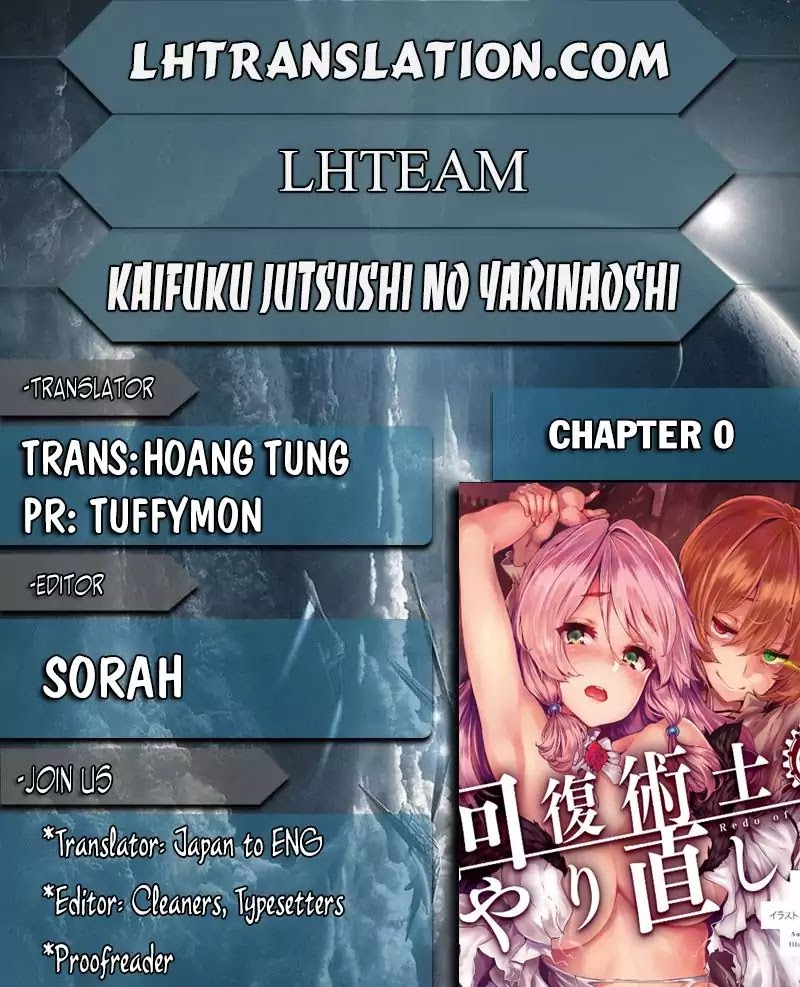

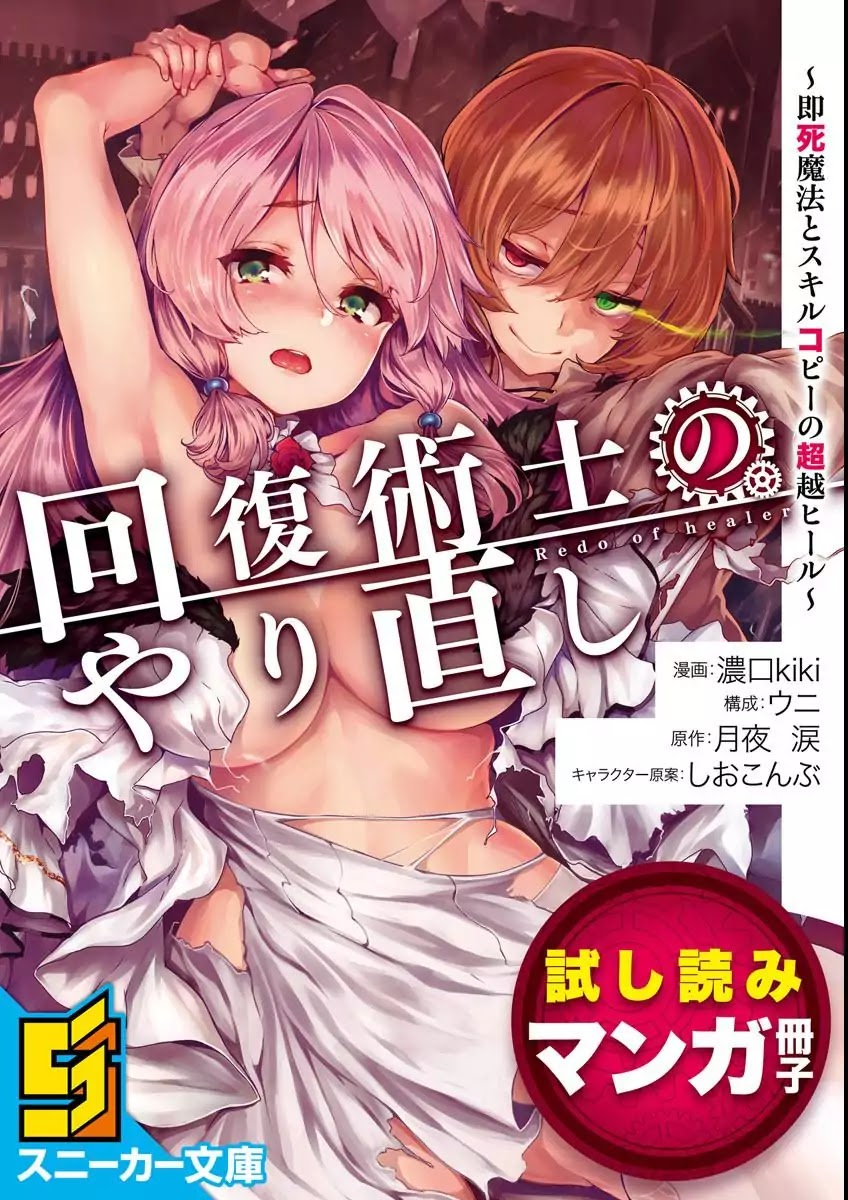

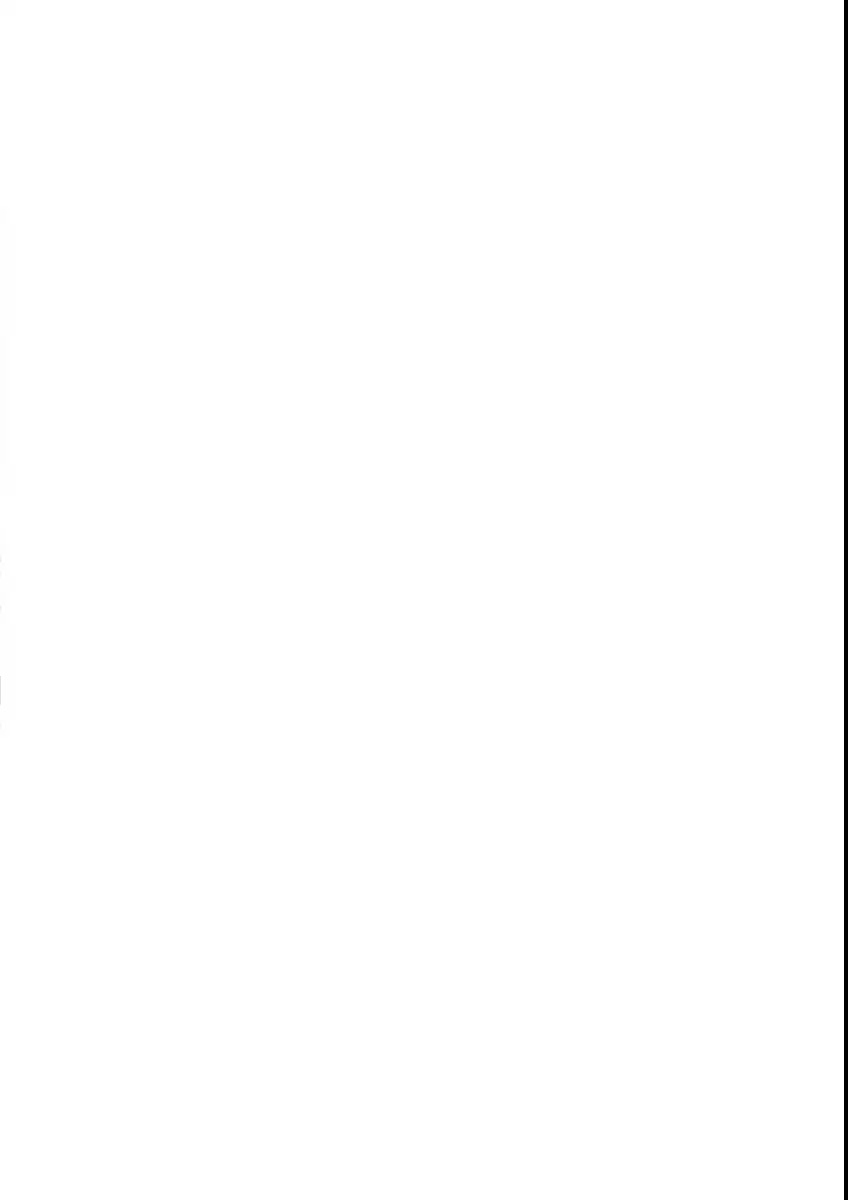

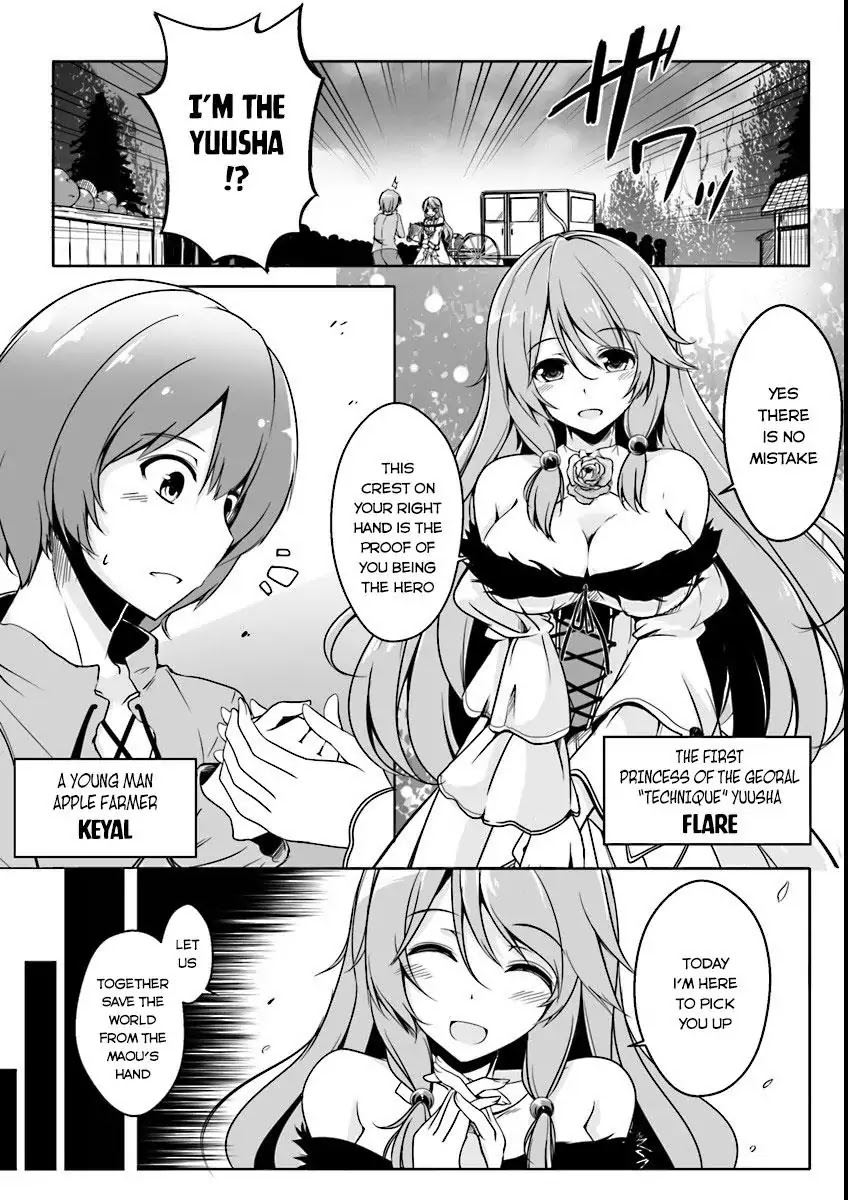

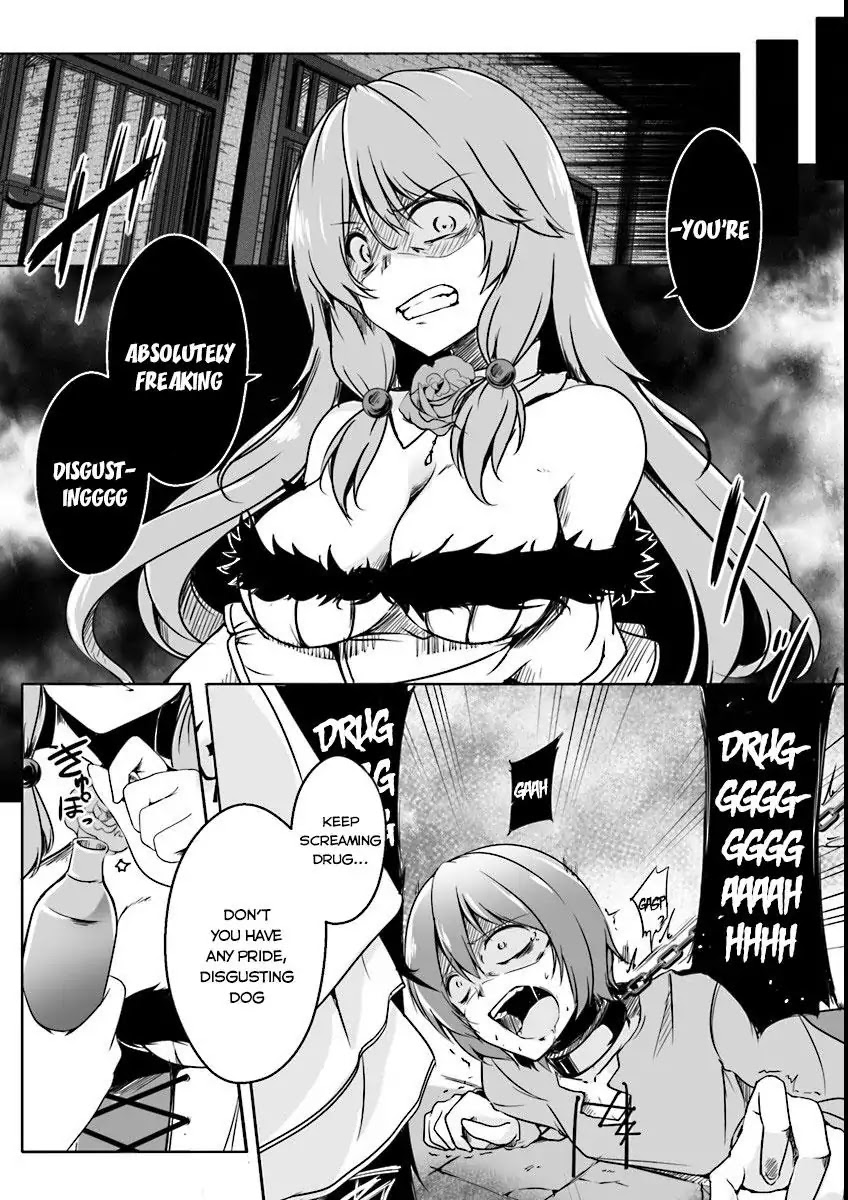

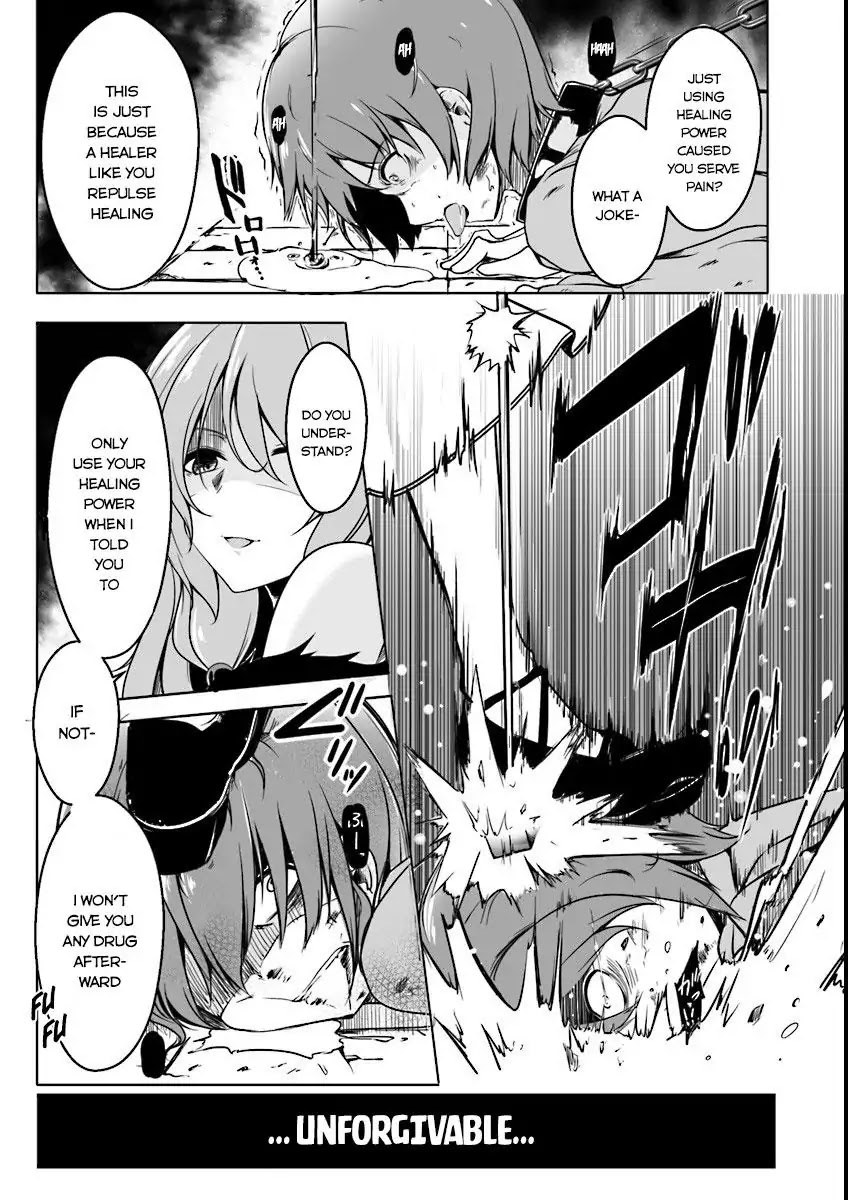

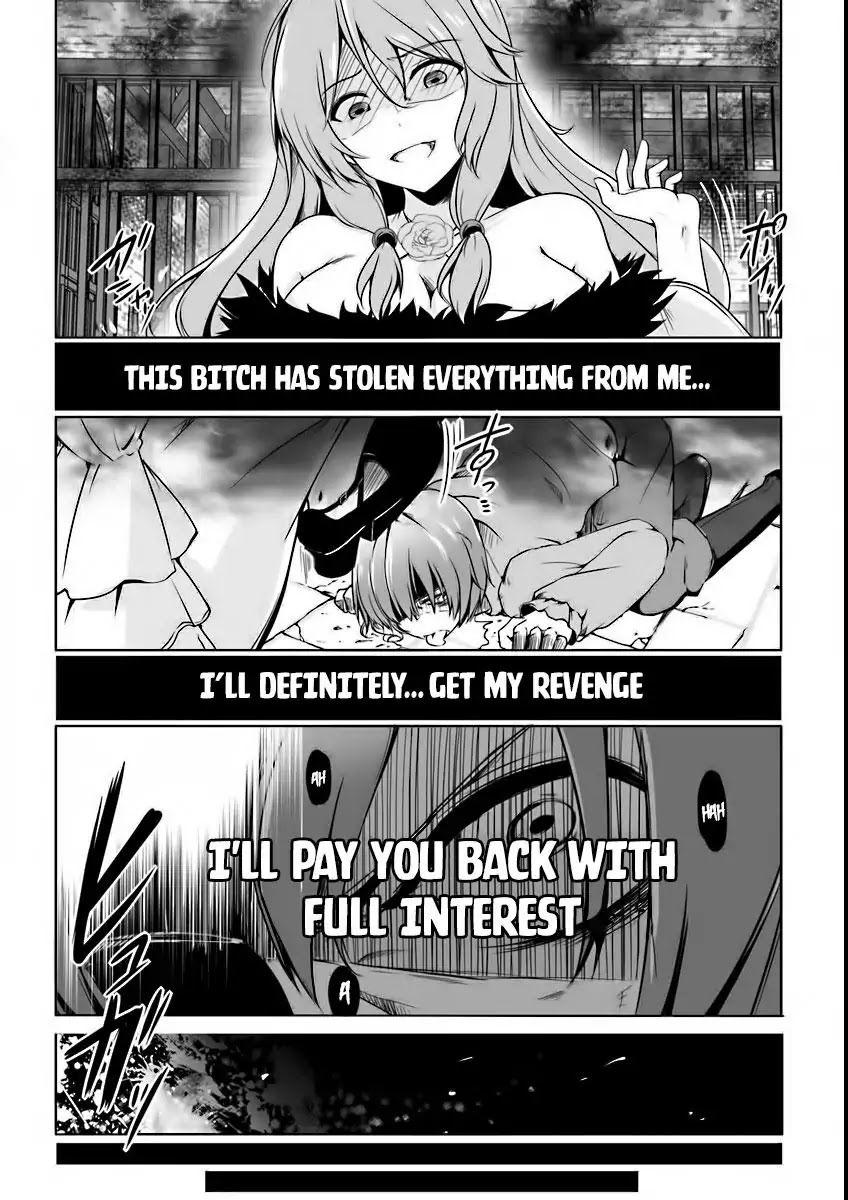

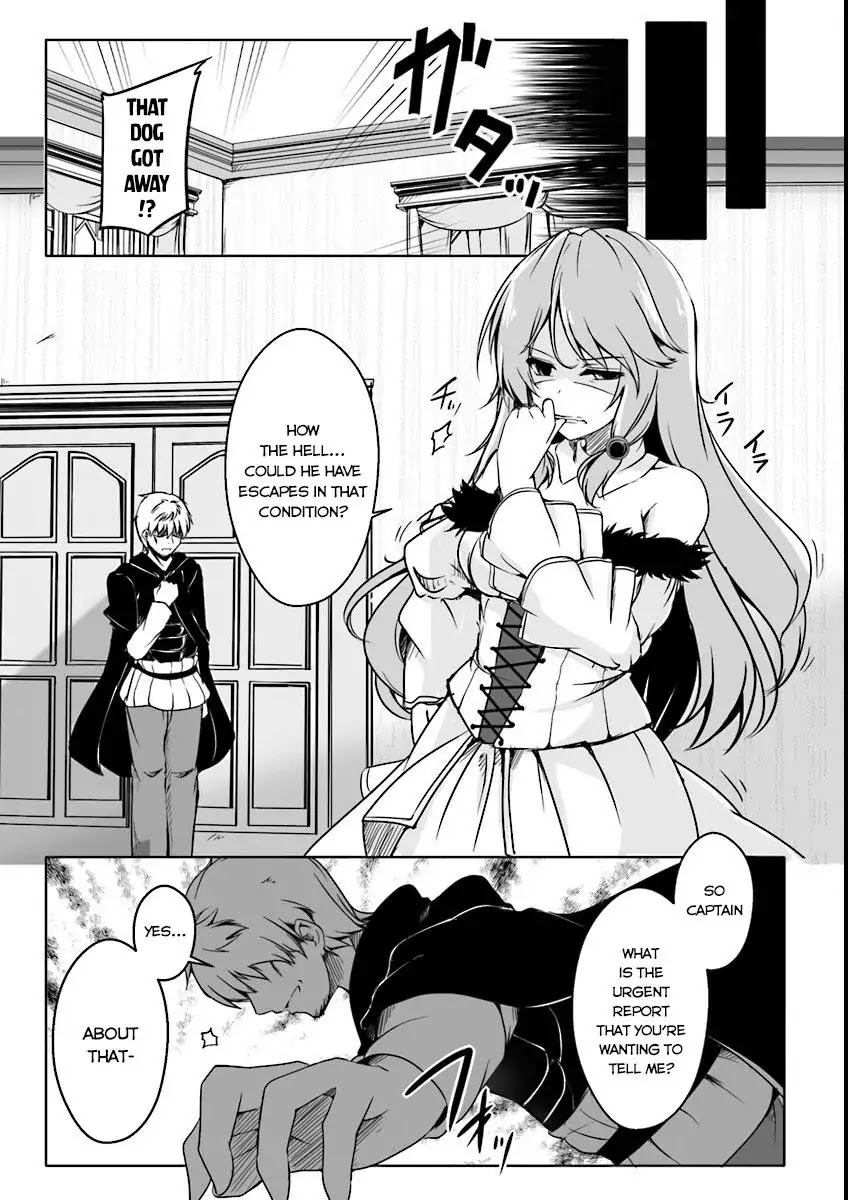

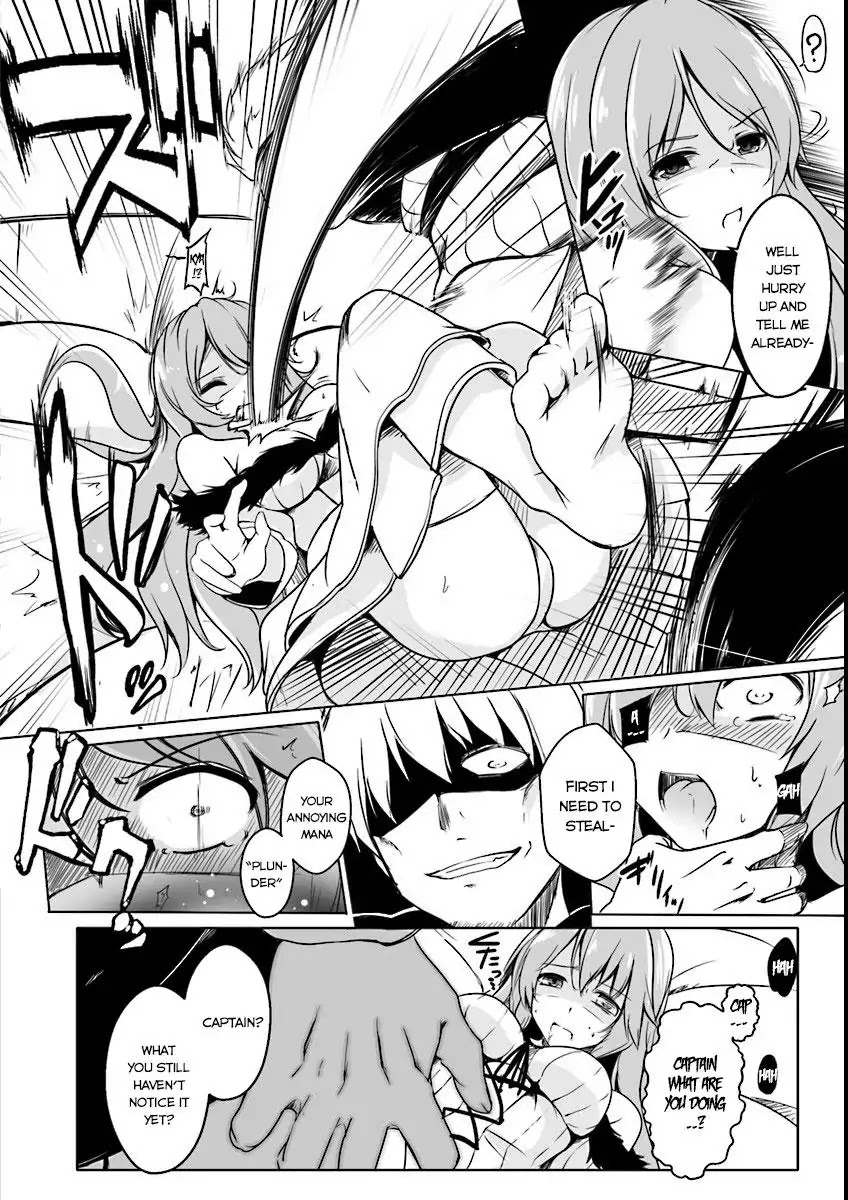

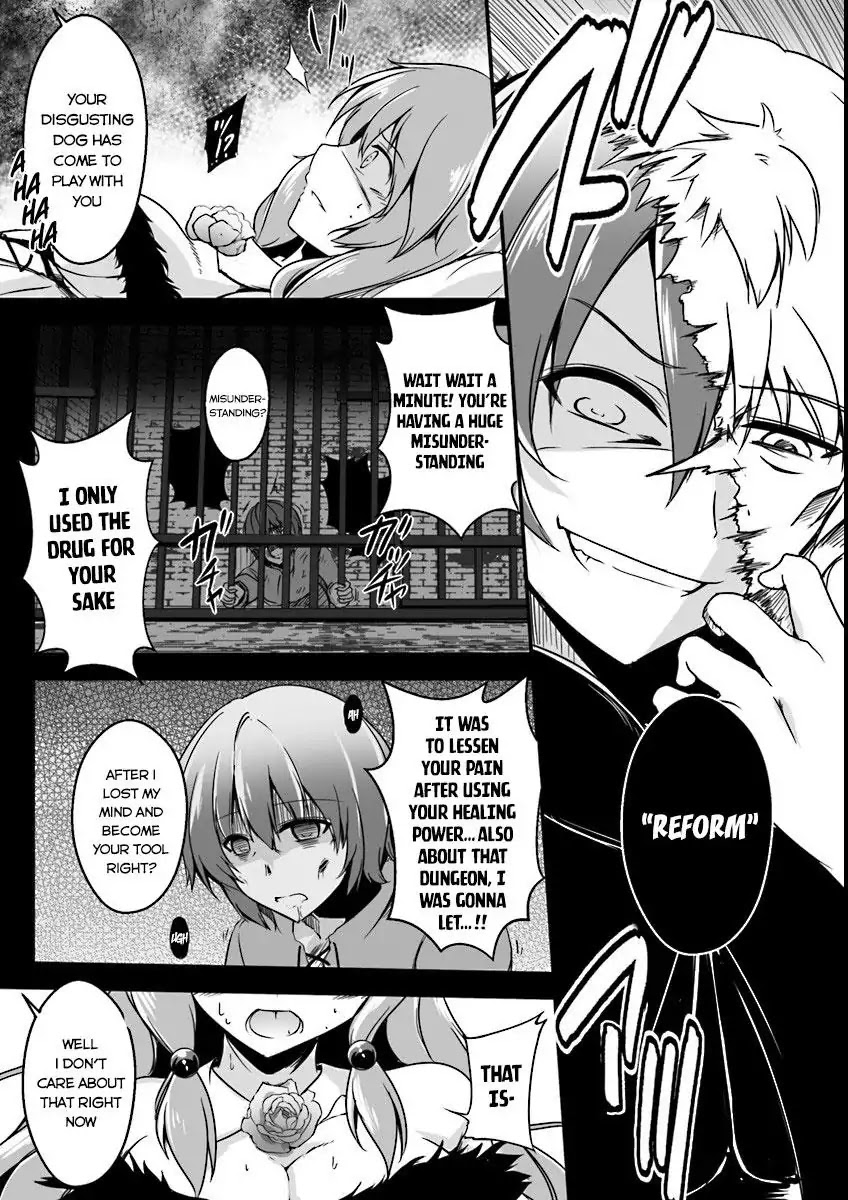

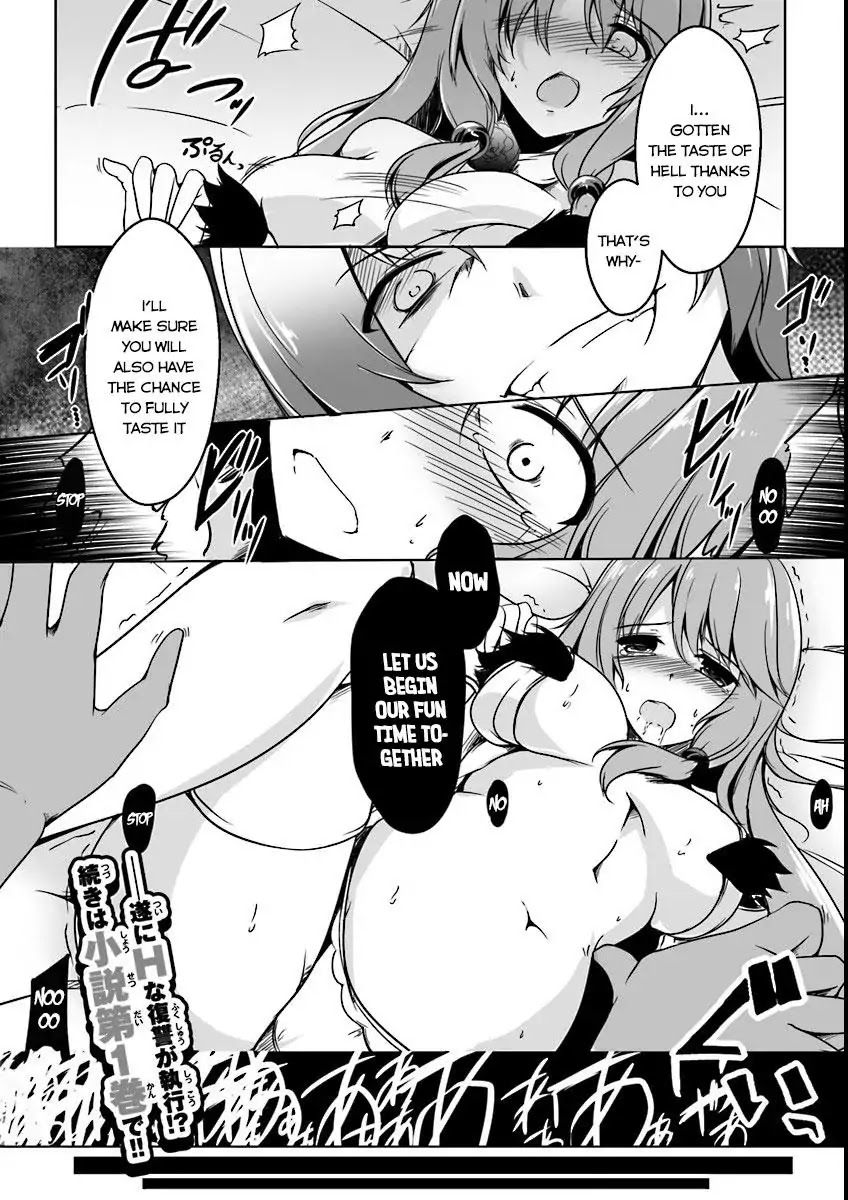

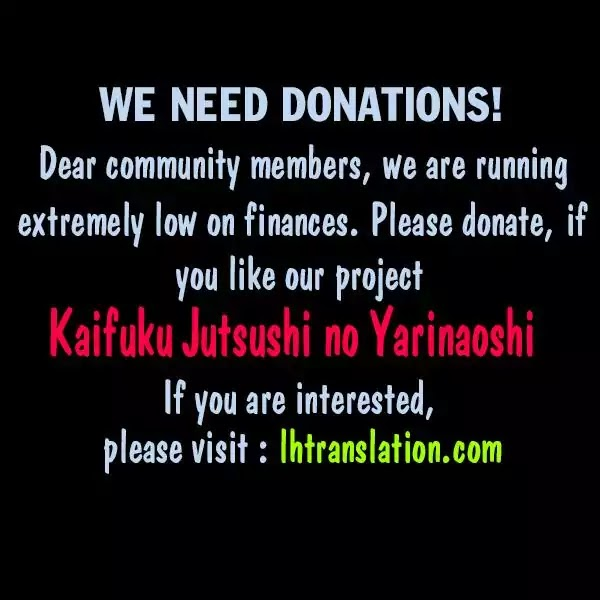

In [11]:
#@title Run This { display-mode: "form" }

print(chn)

da_im = imgd.ImageViewEr(f"/content/chps/ch_{chn}")

da_im.sort_ls("img",".jpg")
da_im.format_imgs()

da_im.show_images()

chn += 1